In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans





In [200]:
#basisinfo
df = pd.read_csv("candy-data.csv", index_col=0)
print(df.info())
print(df.describe())
df.sort_values(by='winpercent', ascending=False, inplace=True)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 100 Grand to Whoppers
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   pluribus          85 non-null     int64  
 9   sugarpercent      85 non-null     float64
 10  pricepercent      85 non-null     float64
 11  winpercent        85 non-null     float64
dtypes: float64(3), int64(9)
memory usage: 8.6+ KB
None
       chocolate     fruity    caramel  peanutyalmondy     nougat  \
count  85.000000  85.000000  85.000000       85.000000  85.000000   
mean    0.435294   0.447059   0.1647

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050


### Verteilung von numerische Variablen


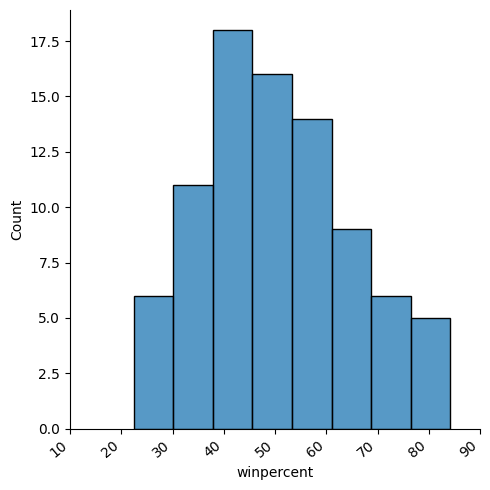

In [151]:
def dist_numerische_variable(df, variable):
     
    ax = sns.displot(df, x=variable)
    ax.set_xticklabels( rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

dist_numerische_variable(df, 'winpercent')

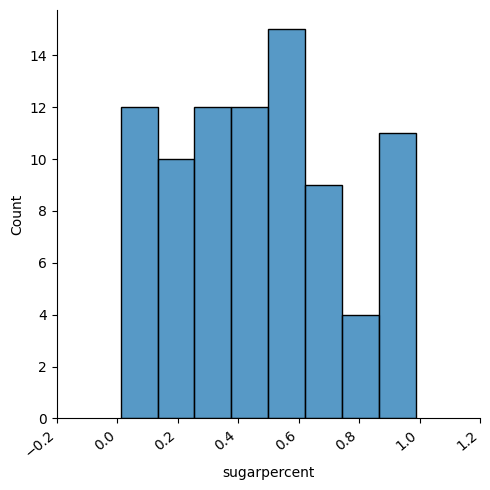

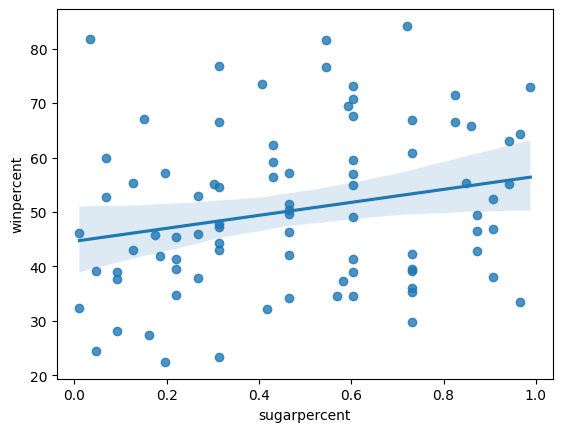

In [152]:
def dist_reg_numerische_variable(df, variable):
     
    dist_numerische_variable(df,variable)
    sns.regplot(x=variable, y='winpercent', data=df)
dist_reg_numerische_variable(df, 'sugarpercent')

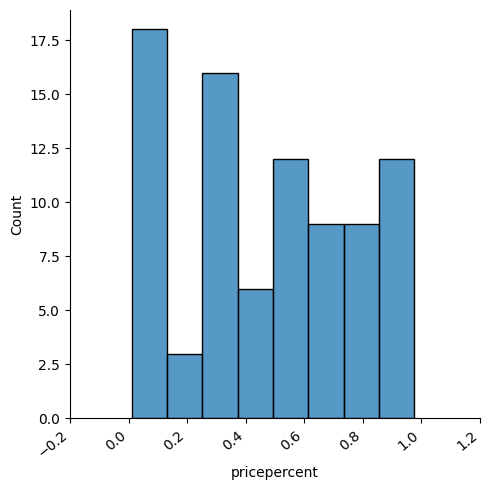

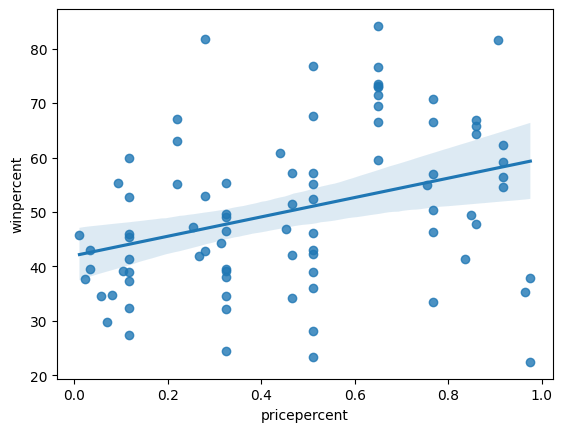

In [153]:
dist_reg_numerische_variable(df, 'pricepercent')

In [172]:
zutaten = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer']

In [187]:
def quantile_per_variable(df, variable):
    df_var = df[df[variable] == 1]
    return pd.DataFrame({variable: df_var.quantile([.0, .25, .5, .75, 1.0])['winpercent']}) 

df_zutaten = pd.DataFrame()    
    
for i in zutaten:
    df_zutaten = pd.concat([df_zutaten, quantile_per_variable(df, i)], axis=1)

df_zutaten.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer
0.00,34.722000,22.445341,32.230995,23.417824,38.975037,49.524113
0.25,50.347546,39.044187,45.194249,55.123475,51.605572,60.906866
0.50,60.800701,42.969034,60.164976,70.109714,60.800701,66.470680
0.75,70.735641,52.109206,66.657865,73.298218,70.351246,71.870163
1.00,84.180290,67.037628,81.642914,84.180290,76.673782,81.642914


beide sind nicht normalverteilt und weisen eine schwache Korrelation mit dem Ergebnis auf
### Zutaten Anzahl & Quantil analysen

In [155]:
df_anzahl = df.copy()
df_anzahl['zutaten_zahl'] = df[zutaten].sum(axis=1)
df_anzahl['winquantile'] = pd.qcut(df['winpercent'], 4, labels=False)

df_anzahl.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl,winquantile
competitorname,,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,3,3
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2,3
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0,1
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1,2


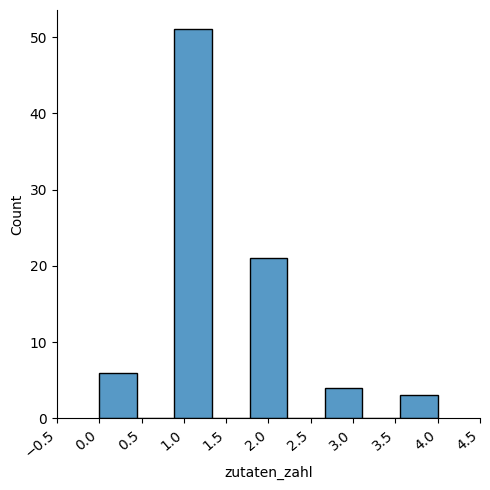

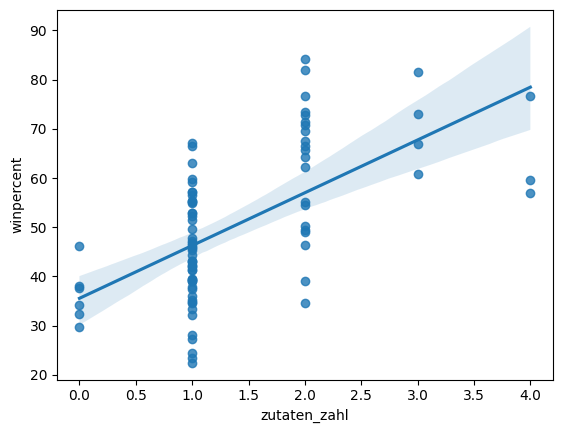

In [156]:
dist_reg_numerische_variable(df_anzahl, 'zutaten_zahl')

Die meisten Produkte haben nicht mehr als zwei Zutaten. Produkte mit drei oder vier Zutaten helfen eher nicht, ein besseres Prozentsatz-Ergebnis zu erzielen.

In [157]:
df_anzahl.groupby('winquantile').mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl
winquantile,,,,,,,,,,,,,
0,0.136364,0.500000,0.136364,0.045455,0.045455,0.000000,0.272727,0.045455,0.636364,0.402227,0.376909,33.219809,0.863636
1,0.142857,0.714286,0.047619,0.047619,0.047619,0.000000,0.333333,0.095238,0.571429,0.431286,0.353857,43.728361,1.000000
2,0.571429,0.476190,0.142857,0.190476,0.047619,0.095238,0.095238,0.333333,0.523810,0.478429,0.514476,54.507490,1.523810
3,0.904762,0.095238,0.333333,0.380952,0.190476,0.238095,0.000000,0.523810,0.333333,0.606286,0.634667,70.625537,2.142857


Es sieht so aus, als hätte Beliebt Süßwaren ungefähr zwei Zutaten, enthält Schokolade und Karamell/peanutalmond, ist möglicherweise ein Riegel, sicher kein hartes Bonbon, oft nur einzeln in der Packung, enthält mehr Zucker und ist auch teurer als der Durchschnitt.

näcste checken wir uns wie viele solche Produkt schon existiert

In [198]:
df_anzahl.groupby(zutaten).aggregate({'winpercent': ['mean', 'median', 'count']}).sort_values((      'winpercent',   'median'), ascending=False)

winpercent  \
                                                                      mean   
chocolate fruity caramel peanutyalmondy nougat crispedricewafer              
1         0      1       0              0      1                 74.307320   
                 0       1              0      0                 69.880879   
                 1       0              1      0                 66.950129   
                         1              1      0                 66.794164   
                 0       0              0      1                 63.761969   
                 1       0              0      0                 61.711233   
                         1              0      1                 59.529251   
                 0       0              1      0                 53.288987   
                                        0      0                 50.344909   
          1      0       0              0      0                 48.982651   
0         0      0       1              1      0                 46.296597   
          1      0       0              0      0                 44.251385   
          0      0       0              0      0                 36.328923   
          1      1       0              0      0                 34.517681   
          0      1       0              0      0                 35.857618   
                 0       1              0      0                 23.417824   

                                                                            \
                                                                    median   
chocolate fruity caramel peanutyalmondy nougat crispedricewafer              
1         0      1       0              0      1                 74.307320   
                 0       1              0      0                 71.465050   
                 1       0              1      0                 66.950129   
                         1              1      0                 66.794164   
                 0       0              0      1                 64.377580   
                 1       0              0      0                 64.353340   
                         1              0      1                 59.529251   
                 0       0              1      0                 53.288987   
                                        0      0                 49.653503   
          1      0       0              0      0                 48.982651   
0         0      0       1              1      0                 46.296597   
          1      0       0              0      0                 42.969034   
          0      0       0              0      0                 35.940647   
          1      1       0              0      0                 34.517681   
          0      1       0              0      0                 33.437550   
                 0       1              0      0                 23.417824   

                                                                       
                                                                count  
chocolate fruity caramel peanutyalmondy nougat crispedricewafer        
1         0      1       0              0      1                    2  
                 0       1              0      0                    9  
                 1       0              1      0                    2  
                         1              1      0                    2  
                 0       0              0      1                    4  
                 1       0              0      0                    3  
                         1              0      1                    1  
                 0       0              1      0                    2  
                                        0      0                   11  
          1      0       0              0      0                    1  
0         0      0       1              1      0                    1  
          1      0       0              0      0                   36  
          0      0

In [158]:
def df_filter(df, variable, wert):
    df_new = df[df[variable] == wert]
    print(df_new.shape[0])
    return df_new
df_choco = df_filter(df_anzahl, 'chocolate', 1)

37


In [159]:
df_peanut= df_filter(df_choco, 'peanutyalmondy', 1)

12


In [160]:
df_ein = df_filter(df_peanut, 'pluribus', 0)

9


In [161]:
df_bar = df_filter(df_ein, 'bar', 1)

6


In [168]:
print(df_bar.winpercent)
df_bar.mean().sort_values(ascending=False)

competitorname
Almond Joy             50.347546
Baby Ruth              56.914547
Mr Good Bar            54.526451
Nestle Butterfinger    70.735641
Snickers               76.673782
Snickers Crisper       59.529251
Name: winpercent, dtype: float64


winpercent          61.454536
zutaten_zahl         3.000000
winquantile          2.333333
bar                  1.000000
chocolate            1.000000
peanutyalmondy       1.000000
pricepercent         0.753500
sugarpercent         0.522667
caramel              0.500000
nougat               0.333333
crispedricewafer     0.166667
fruity               0.000000
pluribus             0.000000
hard                 0.000000
dtype: float64

In [190]:
df_wafer = df_filter(df_anzahl, 'crispedricewafer', 1)
df_wafer.head(10)

7


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl,winquantile,cluster
competitorname,,,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,3,3,2
Hershey's Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.284481,2,3,2
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600,2,3,2
Nestle Crunch,1,0,0,0,0,1,0,1,0,0.313,0.767,66.470680,2,3,2
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,4,2,2
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,3,3,2
Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113,2,2,1


In [163]:
pd.set_option('display.max_rows', 500)
df_anzahl.sort_values('winpercent', ascending=False)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl,winquantile
competitorname,,,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,2,3
Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,2,3
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,3,3
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600,2,3
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,4,3
Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990,2,3
Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556,3,3
Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,2,3
Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050,2,3


Vorausgesetzt, diese Liste enthält alle bei Lidl existierenden Produkte, haben wir bereits ein vorläufiges Ergebnis. Diese Kombination ist nur bei 6 Konkurrenten verfügbar. Außerdem haben die beiden einen höheren Zuckergehalt und Preis. Eine Süßstoff/Zucker-arm-Version lässt uns Kunden erreichen, die mehr auf Gesundheit achten. Eine Choviva-Version lässt uns wertorientierte Kunden gewinnen. (Choviva gilt auch für nachhaltige Kunden, aber das Produkt kann schon vegan sein, und ich gehe davon aus, dass Lidl-Kunden eher wertorientiert sind.)

Eine andere Wahl ist ein Eigenmarkenprodukt, das einfach Reese nachmacht.

### Clustering

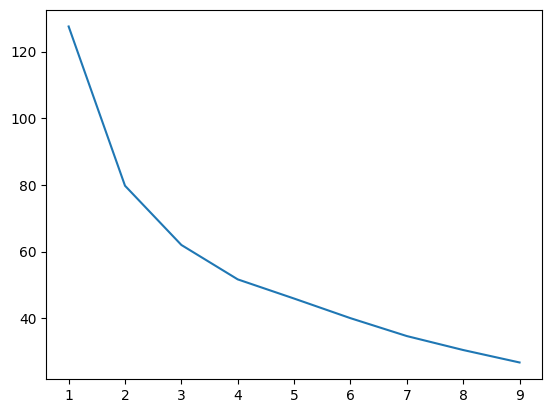

In [164]:

x3 = df.loc[:, ~df.columns.isin(['winpercent', 'sugarpercent', 'pricepercent'])]

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)

In [170]:


# K-Means mit kleiner Clusteranzahl (wegen n=85)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_anzahl['cluster'] = kmeans.fit_predict(x3)

# Cluster-Performance analysieren
cluster_performance = df_anzahl.groupby('cluster').agg(
    {'winpercent': ['mean', 'std', 'count']},

).round(2)
cluster_character = df_anzahl.groupby('cluster').agg(
    ['mean']
).round(2)

print(cluster_performance)
cluster_character

        winpercent             
              mean    std count
cluster                        
0            40.47   7.33    16
1            53.85  17.87    21
2            61.30  11.14    21
3            44.86  11.37    27


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,zutaten_zahl,winquantile
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,
0,0.06,0.75,0.19,0.00,0.00,0.00,0.44,0.0,0.00,0.37,0.28,40.47,1.00,0.75
1,0.76,0.00,0.14,0.33,0.00,0.05,0.00,0.0,0.81,0.50,0.51,53.85,1.29,1.62
2,0.95,0.00,0.38,0.33,0.33,0.29,0.00,1.0,0.00,0.53,0.73,61.30,2.29,2.33
3,0.00,0.96,0.00,0.00,0.00,0.00,0.30,0.0,1.00,0.49,0.35,44.86,0.96,1.15


Die beste Leistung erbringt Gruppe 2, Schokolade mit anderen Zutaten: peanutalmond/nougat/caramel/wafer, sanft, Bar, einzeln verpackt, höchst in Zucker und auch am teuersten. Ein ähnliches Ergebnis wie bei der Analyse der Zutatenanzahl.

### OLS

In [166]:
class linear_regression():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
            return self.reg.predict(x)
        
    def adjusted_r2(self, x, r2):
        n = x.shape[0]
        p = x.shape[1]
        adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
        return adjusted_r2
    
    def intercept(self):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            return self.reg.intercept_


    def linear_regression_on_y(self, x, y):



        feature = x.columns.to_list()

        #Standardisierung überspringen, da die Merkmale entweder auf derselben Skala liegen oder Dummy-Variablen sind.
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        self.reg  = LinearRegression()
        self.reg .fit(X_train, y_train)

        # predrict on test set
        y_pred = self.reg.predict(X_test)

        # metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        adj_r2 = self.adjusted_r2(x, r2)

        #coefficients
        reg_summary = pd.DataFrame(data=feature, columns=['Features'])
        reg_summary['Coefficients'] = self.reg .coef_.T    

        #check residuals
        y_hat = self.reg.predict(X_train)
        fig, ax = plt.subplots(1, 2)
        sns.histplot(y_train - y_hat, kde=True, ax=ax[0])
        sns.regplot(x=y_hat, y=(y_train - y_hat), ax=ax[1])

        print(f"coefficients: {reg_summary.sort_values('Coefficients', ascending=False)}\n")
        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(f"adjusted R^2: {adj_r2:.3f}\n")

  

coefficients:             Features  Coefficients
0          chocolate     18.866390
9       sugarpercent      9.948579
5   crispedricewafer      8.758688
3     peanutyalmondy      8.738057
1             fruity      8.311682
4             nougat      4.494756
7                bar      0.087762
2            caramel     -0.040491
8           pluribus     -3.940221
10      pricepercent     -4.242897
6               hard     -5.056733

MSE: 160.983

R^2: 0.197

adjusted R^2: 0.076



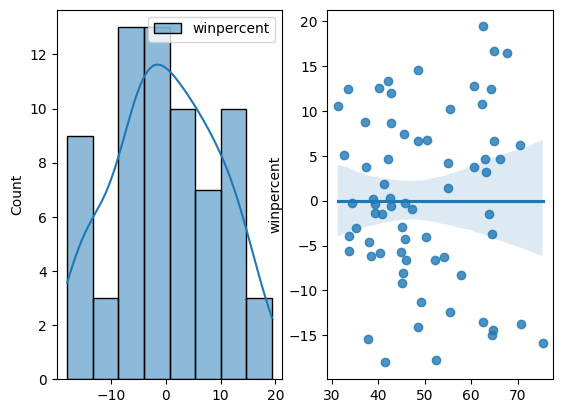

In [167]:
x1 = df.loc[:, ~df.columns.isin(['winpercent'])]
y = df[['winpercent']]
lr_x1 = linear_regression()
lr_x1.linear_regression_on_y(x1, y)

coefficients:        Features  Coefficients
0          hard     -6.194003
1           bar      3.354271
2      pluribus     -3.012080
3  sugarpercent      5.747038
4  pricepercent      0.470388
5  zutaten_zahl      7.992811
MSE: 186.946

R^2: 0.067

adjusted R^2: -0.004



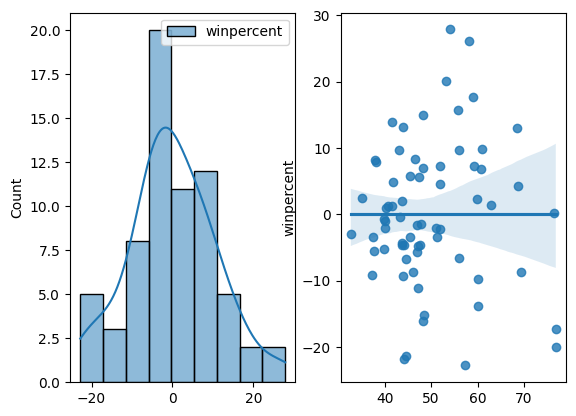

In [132]:
#effekt der zutaten anzahlen, nihmt zutaten aus um Multikollinearität zu vermeiden
x2 = df_anzahl.loc[:, ~df_anzahl.columns.isin(['winpercent', 'winquantile', 'cluster'] + zutaten)]
y = df_anzahl[['winpercent']]
lr_x2 = linear_regression()
lr_x2.linear_regression_on_y(x2, y)

Das Ergebnis zeigt, dass die lineare Regression für diese Datensätze sehr ungeeignet ist.
Die Residuen sind nicht normalverteilt und die Homoskedastizität ist nicht sicher.
- Es besteht keine Linearität zwischen x und y.
- Endogenität: Wenn wir davon ausgehen, dass keine Messfehler vorhanden sind, dann bestanden.
- Eine Autokorrelation ist nicht vorhanden.
- Multikollinearität wurde noch nicht getestet, ist hier aber auch nicht wichtig.

Außerdem: 
- Die R² ist niedrig und die adjustierten R² sogar noch niedriger, d. h., es gibt zu viele unnötige Merkmale.
- Wie der Artikel sagt, berücksichtigt OLS nicht, ob alle Zutaten zusammenpassen.

### schnell random forest









In [145]:
class random_forest():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
        return self.reg.predict(x)

    def random_forest_on_units(self, x, y):



        #skip standardization bcs it's unnecessary for tree based models
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        self.reg = RandomForestRegressor(n_estimators=100, random_state=42)
        self.reg.fit(X_train, y_train)


        preds = self.reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        summary = pd.DataFrame(data=x1.columns, columns=["feature"])
        summary['importance'] = self.reg.feature_importances_


        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(summary.sort_values('importance', ascending=False))





In [146]:
rf_x1 = random_forest()
rf_x1.random_forest_on_units(x1, y)

MSE: 142.057

R^2: 0.291

             feature  importance
0          chocolate    0.439130
9       sugarpercent    0.186829
10      pricepercent    0.154064
3     peanutyalmondy    0.058308
7                bar    0.046858
5   crispedricewafer    0.026651
1             fruity    0.026245
8           pluribus    0.021285
2            caramel    0.020621
6               hard    0.011738
4             nougat    0.008270


non-linearität hat ein bessere R^2 als Linear model, troztdem unterschied ist nicht so groß

### Lasso

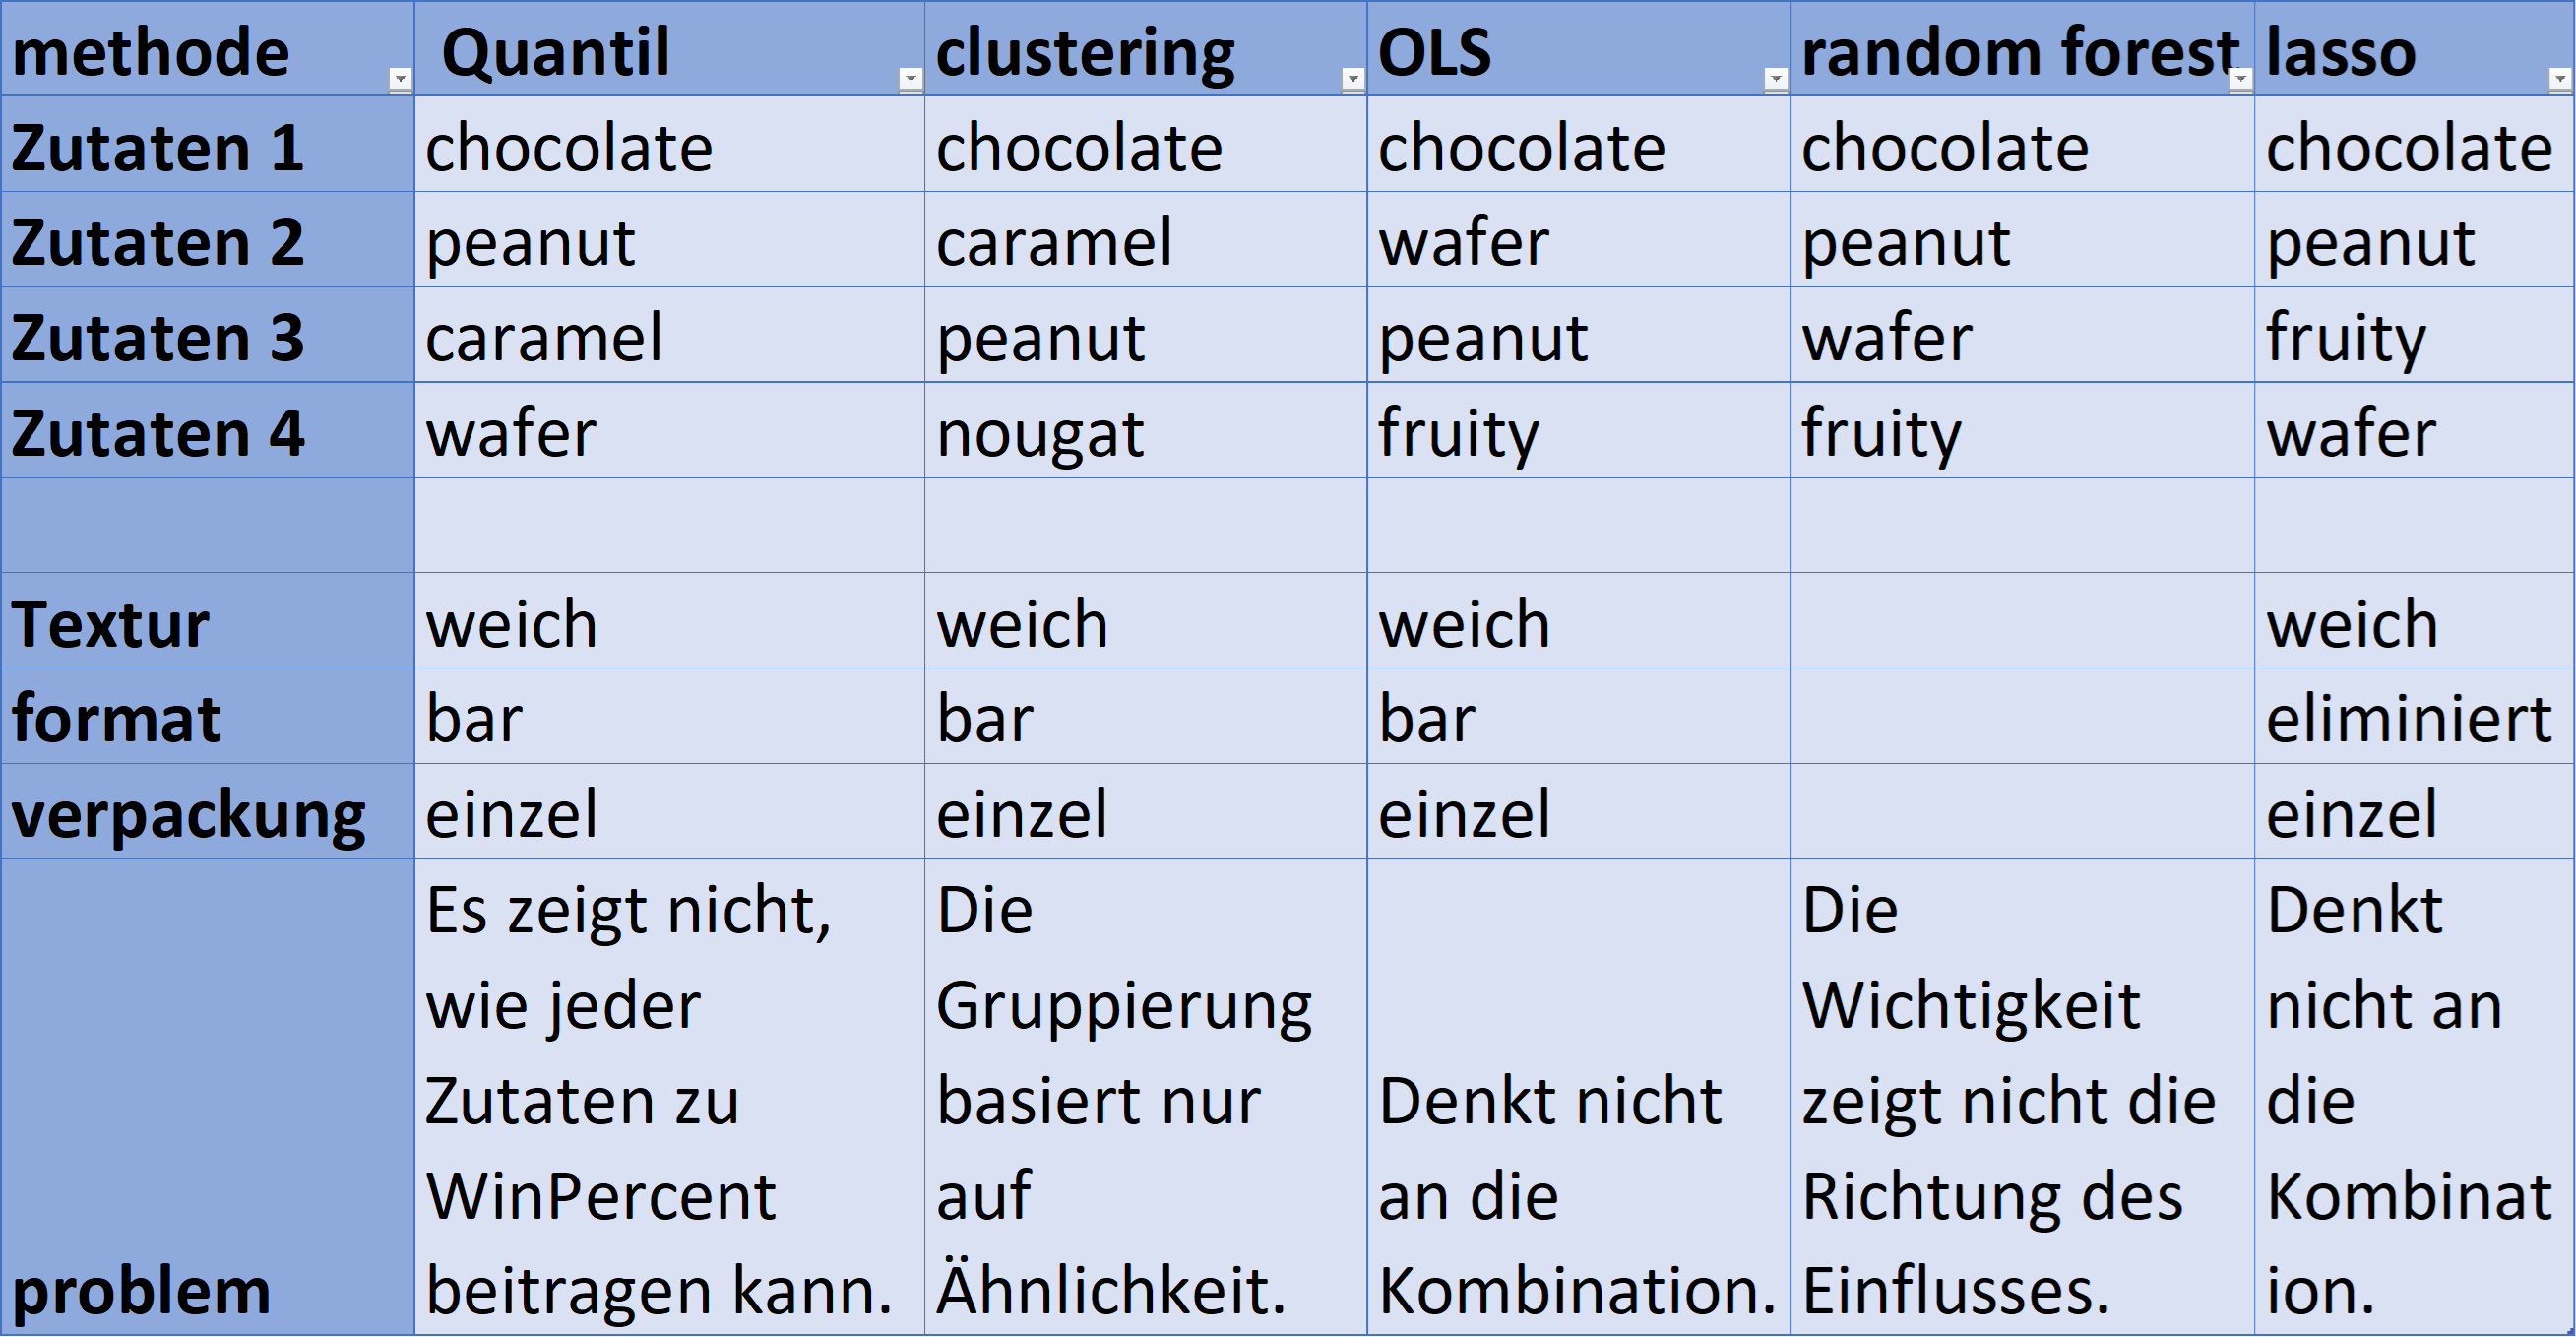

basiert auf das Ergebnis, die beliebsten kombination soll in die folgende:
schokolade + 
1. Erdnuss
2. karamel
3. waffel


schokolade + Erdnuss + 
1. nichts
2. karamel
3. waffel

die seltenste Komponent: 

waffel + 
1. karamel
2. nougat
3. Erdnuss
4. Obst 

Außerdem checken p wert für Bar Format